In [4]:
import numpy as np
import matplotlib.pyplot as plt

from qubit_approximant import *

%matplotlib inline

0.05492126076036834


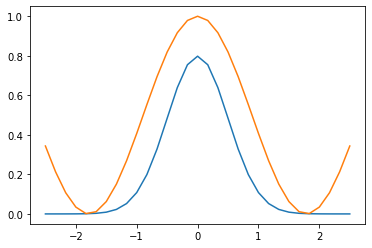

In [8]:
x = np.linspace(-2.5, 2.5, 31)
fn = np.exp(-((x) ** 2) / (2 * 0.5**2)) / (0.5 * np.sqrt(2 * np.pi))
layers = 8
np.random.seed(3)
params = 0.7 * np.random.randn(2 * layers)

model = RyModel(x=x, encoding="prob")
metric = Metric("mse")
cost = Cost(fn, model, metric)
opt = BlackBoxOptimizer(method="L-BFGS-B")
params = opt(cost, cost.grad, params)
fn_approx = model(params)

print(metric(fn_approx - fn))
plt.plot(x, fn)
plt.plot(x, fn_approx)

In [4]:
from scipy.optimize._differentiable_functions import ScalarFunction

ImportError: cannot import name 'ScalarFunction' from 'scipy.optimize' (/Users/macvp/miniconda3/envs/QC_env/lib/python3.10/site-packages/scipy/optimize/__init__.py)

0.0013018627138620706


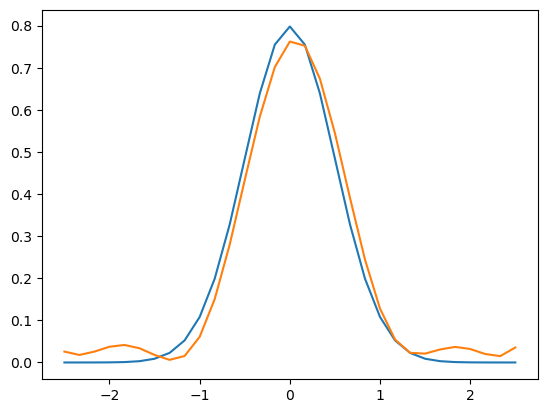

In [8]:
x = np.linspace(-2.5, 2.5, 31)
fn = np.exp(-((x) ** 2) / (2 * 0.5**2)) / (0.5 * np.sqrt(2 * np.pi))
layers = 5
np.random.seed(20)
params = 0.7 * np.random.randn(4 * layers)

model = Model(x=x, encoding="prob")
metric = Metric("mse")
cost = Cost(fn, model, metric)
opt = AdamOptimizer(5000)
params = opt(cost, cost.grad, params)
fn_approx = model(params)

print(metric(fn_approx - fn))
plt.plot(x, fn)
plt.plot(x, fn_approx)